<a href="https://colab.research.google.com/github/Lapasrada-p/BrainTumorMRI/blob/main/BrainTumor_MRI_Lapasrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Brain Tumor MRI
**dataset:**  https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

**what is a brain tumor?:**
A brain tumor is a collection, or mass, of abnormal cells in your brain. Your skull, which encloses your brain, is very rigid. Any growth inside such a restricted space can cause problems.

**objective:**
I am going to use Convolutional Neural Network(CNN) to predict the type of a brain tumore base on MRI images.

Type of a brain tumor that I will predict: 

*   glioma: (glioblastoma) เนื้องอกสมองชนิดร้ายแรง
*   meningioma: เนื้องอกของเยื่อหุ้มสมอง
*   no tumor: ไม่พบเนื้องอกในสมอง
*   pituitary:เนื้องอกของต่อมใต้สมอง



Lapasrada Kumjulla 630610757

# Download dataset

In [ ]:
! pip install -q kaggle

In [ ]:
%reset -f

from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lapasradakumjulla","key":"09c225811ed9ea9812d4ff52b118e2e1"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

 98% 146M/149M [00:03<00:00, 56.0MB/s]
100% 149M/149M [00:03<00:00, 45.3MB/s]


In [ ]:
! unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

# Split data

In [ ]:
import os
import numpy as np
import shutil

In [ ]:
root_dir = 'dataset'
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

for cls in classes:
  os.makedirs(root_dir +'/val/' + cls)
  os.makedirs(root_dir +'/test/' + cls)
  os.makedirs(root_dir +'/train/'+cls)

In [ ]:
#load dataset for test dataset and valid dataset
def loadDataset(currentCls):
  src = "Testing/"+currentCls 

  val_ratio = 0.3
  test_ratio = 0.7

  allFileNames = os.listdir(src)
  np.random.shuffle(allFileNames)
  val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                           [int(len(allFileNames)*(1 - test_ratio))])

  val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
  test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

  print('Total images: ', len(allFileNames))
  print('Validation: ', len(val_FileNames))
  print('Testing: ', len(test_FileNames))

  for name in val_FileNames:
      shutil.copy(name, "dataset/val/"+currentCls)

  for name in test_FileNames:
      shutil.copy(name, "dataset/test/"+currentCls)

In [ ]:
# loadDataset for train data
def loadDataset_Train(cls):
  src = "Training/"+cls 
  allFileNames = os.listdir(src)

  allFileNames = os.listdir(src)
  np.random.shuffle(allFileNames)
  train_FileNames, keep = np.split(np.array(allFileNames),
                                   [int(len(allFileNames))])

  train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]

  print('Total images: ', len(allFileNames))
  print('Training: ', len(train_FileNames))

  for name in train_FileNames:
      shutil.copy(name, "dataset/train/"+cls)

In [ ]:
loadDataset('glioma') 
loadDataset_Train('glioma')
loadDataset('meningioma')
loadDataset_Train('meningioma')
loadDataset('notumor')
loadDataset_Train('notumor')
loadDataset('pituitary')
loadDataset_Train('pituitary')

Total images:  300
Validation:  90
Testing:  210
Total images:  1321
Training:  1321
Total images:  306
Validation:  91
Testing:  215
Total images:  1339
Training:  1339
Total images:  405
Validation:  121
Testing:  284
Total images:  1595
Training:  1595
Total images:  300
Validation:  90
Testing:  210
Total images:  1457
Training:  1457


# Sample Image

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
dir1 = ('dataset/train')
category = []

for file in os.listdir(dir1):
    category.append(file)
    
for i in category:
    file_path = os.path.join(dir1,i)
    
for file in os.listdir(file_path):
      img_path = os.path.join(file_path,file)
      image = cv2.imread(img_path)

(512, 512, 3)


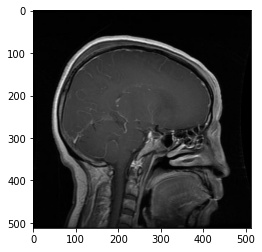

In [ ]:
plt.imshow(image)
print(image.shape)

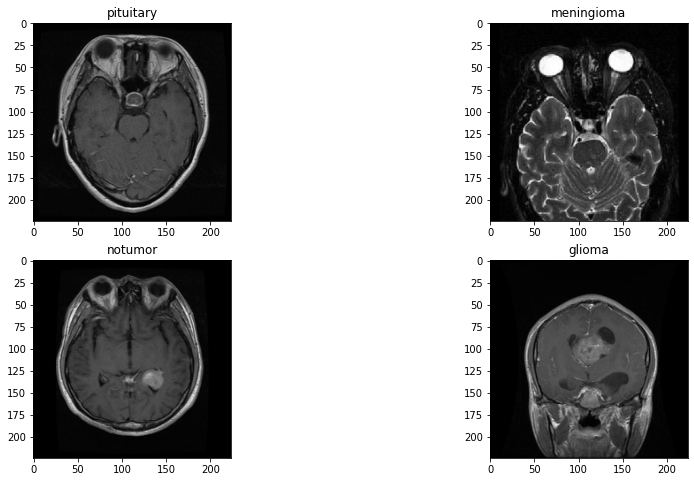

In [ ]:
plt.figure(figsize=(15,8))

img_path = ['/pituitary/Tr-piTr_0001.jpg','/notumor/Tr-noTr_0001.jpg','/meningioma/Tr-meTr_0001.jpg','/glioma/Tr-glTr_0001.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(dir1 + img_path[i])
    img = cv2.resize(img, (224, 224))
    plt.imshow(img)
    plt.title(category[i])

# Data Preparation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size = 64
img_rows, img_cols = 512, 512

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='dataset/train',
    labels='inferred',  #ให้ชื่อแต่ละ labels เป็นไปตาม folder ที่เป็น class ของแต่ละประเภทของรูปภาพ
    label_mode='categorical',  #ข้อมูลที่จัดเป็นกลุ่ม
    batch_size=batch_size,
    image_size=(img_rows, img_cols))

val_ds = keras.utils.image_dataset_from_directory(
    directory='dataset/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_rows, img_cols))

test_ds = keras.utils.image_dataset_from_directory(
    directory='dataset/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_rows, img_cols))

Found 5712 files belonging to 4 classes.
Found 392 files belonging to 4 classes.
Found 919 files belonging to 4 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


#Run before train (all) Model

In [ ]:
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.models import load_model
Adam = tf.keras.optimizers.Adam
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

In [ ]:
#fuction for calling to use metrics accuracy,precision_m, recall_m , f1_m

import keras.backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Create Model1

In [ ]:
model1 = tf.keras.models.Sequential()

# Preprocessing  
model1.add(keras.Input(shape = (512, 512 , 3)))
model1.add(layers.Resizing(height=128, width=128, interpolation='bilinear'))
model1.add(layers.Rescaling(scale=1./255))   #แปลงค่าของชุดข้อมูลภาพให้อยู่ในช่วง 0 ถึง 1

# Data Augmentation -แก้ปัญหาoverfitting
model1.add(layers.RandomFlip(mode='horizontal_and_vertical'))
model1.add(layers.RandomRotation(factor=.2))  #results in an output rotating by a random amount in the range [-20% * 2pi, 20% * 2pi].

#1 CNN layer
model1.add(layers.Conv2D(filters=128, kernel_size = (3,3)))
model1.add(layers.BatchNormalization())
model1.add(layers.Activation("relu"))

#2 CNN layer
model1.add(layers.Conv2D(filters=64, kernel_size = (3,3)))
model1.add(layers.BatchNormalization())
model1.add(layers.Activation("relu"))
model1.add(layers.MaxPool2D(pool_size=(2,2)))

#3 CNN layer
model1.add(layers.Conv2D(filters=32, kernel_size = (3,3)))
model1.add(layers.BatchNormalization())
model1.add(layers.Activation("relu"))

#4 CNN layer
model1.add(layers.Conv2D(filters=64, kernel_size = (3,3)))
model1.add(layers.BatchNormalization())
model1.add(layers.Activation("relu"))
model1.add(layers.MaxPool2D(pool_size=(2,2)))

# fully connected layer
model1.add(layers.Flatten())
model1.add(layers.Dense(64))
model1.add(layers.BatchNormalization())
model1.add(layers.Activation("relu"))
model1.add(layers.Dense(32))
model1.add(layers.BatchNormalization())
model1.add(layers.Activation("relu"))

#output layer
model1.add(layers.Dense(4))
model1.add(layers.Activation('softmax'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 128, 128, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 128)    512       
 ormalization)                                        

In [ ]:
#use metrics accuracy

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# history1 = model1.fit(train_ds, 
#                     epochs=200,
#                     validation_data=val_ds)

use early stop เพื่อกำหนดให้ model คอย monitor ค่า loss จาก validation data  แล้วถ้าค่า loss ใน รอบการ training ไม่ลดลงหรือมีค่าเพิ่มขึ้น ให้หยุดการ training  ค่าpatience=2 หมายถึงให้หยุดเมื่อค่า loss เพิ่มขึ้น 2 รอบ (epochs) แล้ว

In [ ]:
#  early stop ใช้ตอนทดลองโมเดล

# early_stop = EarlyStopping(monitor='val_loss', patience=2)
# history1 = model1.fit(train_ds, epochs=15, validation_data=val_ds, callbacks=[early_stop])

In [ ]:
#use metrics accuracy,precision_m, recall_m , f1_m

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy' , precision_m, recall_m , f1_m])

In [ ]:
history1 = model1.fit(train_ds, epochs=100, batch_size=128 , validation_data=val_ds)

Epoch 1/100
90/90 [==============================] - 35s 336ms/step - loss: 0.6588 - accuracy: 0.7600 - precision_m: 0.8086 - recall_m: 0.6788 - f1_m: 0.7362 - val_loss: 4.5969 - val_accuracy: 0.2296 - val_precision_m: 0.2321 - val_recall_m: 0.2321 - val_f1_m: 0.2321
Epoch 2/100
90/90 [==============================] - 30s 327ms/step - loss: 0.4666 - accuracy: 0.8302 - precision_m: 0.8598 - recall_m: 0.7910 - f1_m: 0.8236 - val_loss: 4.5539 - val_accuracy: 0.2296 - val_precision_m: 0.2165 - val_recall_m: 0.2165 - val_f1_m: 0.2165
Epoch 3/100
90/90 [==============================] - 30s 327ms/step - loss: 0.3963 - accuracy: 0.8540 - precision_m: 0.8801 - recall_m: 0.8314 - f1_m: 0.8549 - val_loss: 5.0322 - val_accuracy: 0.2321 - val_precision_m: 0.2365 - val_recall_m: 0.2344 - val_f1_m: 0.2354
Epoch 4/100
90/90 [==============================] - 30s 327ms/step - loss: 0.3517 - accuracy: 0.8713 - precision_m: 0.8861 - recall_m: 0.8526 - f1_m: 0.8689 - val_loss: 3.9147 - val_accuracy: 0.2

In [ ]:
loss1,accuracy1,precision1,recall1,f1_1 = model1.evaluate(test_ds)
print('Model1 ')
print('loss : ', loss1)
print('accuracy : ', accuracy1)
print('precision : ', precision1)
print('recall : ',recall1)
print('f1 : ', f1_1)

15/15 [==============================] - 3s 171ms/step - loss: 0.1574 - accuracy: 0.9391 - precision_m: 0.9438 - recall_m: 0.9380 - f1_m: 0.9408
Model1 
loss :  0.1574149876832962
accuracy :  0.9390642046928406
precision :  0.9437780380249023
recall :  0.9379529356956482
f1 :  0.9408144354820251


In [ ]:
model1.save_weights("BrainTumorMRI-model_weight-1.h5")
model1.save("BrainTumorMRI-model-1.h5")

In [ ]:
#load model

# loaded_model = load_model("BrainTumorMRI-model-1.h5",custom_objects={"recall": recall_m, "precision":precision_m, "f1":f1_m})
# loaded_model.summary()

In [ ]:
hist_df = pd.DataFrame(history1.history) 

In [ ]:
hist_csv_file = 'history1.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

# Create Model2

In [ ]:
model2 = tf.keras.models.Sequential()

# Preprocessing  -แปลงค่าของชุดข้อมูลภาพให้อยู่ในช่วง 0 ถึง 1
model2.add(keras.Input(shape = (512, 512 , 3)))
model2.add(layers.Resizing(height=256, width=256, interpolation='bilinear'))
model2.add(layers.Rescaling(scale=1./255))

# Data Augmentation -แก้ปัญหาoverfitting
model2.add(layers.RandomFlip(mode='horizontal_and_vertical'))
model2.add(layers.RandomRotation(factor=.2))

#1 CNN layer
model2.add(layers.Conv2D(filters=32, kernel_size = (4,4)))
model2.add(layers.Activation("relu"))

#2 CNN layer
model2.add(layers.Conv2D(filters=32, kernel_size = (4,4)))
model2.add(layers.Activation("relu"))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#3 CNN layer
model2.add(layers.Conv2D(filters=64, kernel_size = (4,4)))
model2.add(layers.Activation("relu"))

#4 CNN layer
model2.add(layers.Conv2D(filters=64, kernel_size = (4,4)))
model2.add(layers.Activation("relu"))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

# fully connected layer
model2.add(layers.Flatten())
model2.add(layers.Dense(512))
model2.add(layers.Activation("relu"))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(512))
model2.add(layers.Activation("relu"))
model2.add(layers.Dropout(0.2))

#output layer
model2.add(layers.Dense(4))
model2.add(layers.Activation('softmax'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 256, 256, 3)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 253, 253, 32)      1568      
                                                                 
 activation (Activation)     (None, 253, 253, 32)      0         
                                                        

In [ ]:
#use metrics accuracy

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# history2 = model2.fit(train_ds, 
#                     epochs=200,
#                     validation_data=val_ds)

In [ ]:
# early_stop = EarlyStopping(monitor='val_loss', patience=2)
# history2 = model2.fit(train_ds, epochs=15, validation_data=val_ds, callbacks=[early_stop])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy' , precision_m, recall_m , f1_m])

In [ ]:
history2 = model2.fit(train_ds, epochs=100, batch_size=128 , validation_data=val_ds)

Epoch 1/100
90/90 [==============================] - 66s 559ms/step - loss: 1.2327 - accuracy: 0.5401 - precision_m: 0.6218 - recall_m: 0.3429 - f1_m: 0.4207 - val_loss: 0.9182 - val_accuracy: 0.6403 - val_precision_m: 0.6656 - val_recall_m: 0.5312 - val_f1_m: 0.5904
Epoch 2/100
90/90 [==============================] - 50s 546ms/step - loss: 0.6987 - accuracy: 0.7278 - precision_m: 0.7747 - recall_m: 0.6547 - f1_m: 0.7087 - val_loss: 0.7586 - val_accuracy: 0.7372 - val_precision_m: 0.7647 - val_recall_m: 0.6875 - val_f1_m: 0.7238
Epoch 3/100
90/90 [==============================] - 50s 547ms/step - loss: 0.5767 - accuracy: 0.7771 - precision_m: 0.8097 - recall_m: 0.7373 - f1_m: 0.7714 - val_loss: 0.5827 - val_accuracy: 0.7449 - val_precision_m: 0.7940 - val_recall_m: 0.7143 - val_f1_m: 0.7513
Epoch 4/100
90/90 [==============================] - 50s 548ms/step - loss: 0.5545 - accuracy: 0.7756 - precision_m: 0.8047 - recall_m: 0.7358 - f1_m: 0.7683 - val_loss: 0.5963 - val_accuracy: 0.7

In [ ]:
loss2,accuracy2,precision2,recall2,f1_2 = model2.evaluate(test_ds)
print('Model2 ')
print('loss : ', loss2)
print('accuracy : ', accuracy2)
print('precision : ', precision2)
print('recall : ',recall2)
print('f1 : ', f1_2)

15/15 [==============================] - 5s 273ms/step - loss: 0.1493 - accuracy: 0.9597 - precision_m: 0.9577 - recall_m: 0.9577 - f1_m: 0.9577
Model2 
loss :  0.14934150874614716
accuracy :  0.9597388505935669
precision :  0.9577445983886719
recall :  0.9577445983886719
f1 :  0.9577445387840271


In [ ]:
model2.save_weights("BrainTumorMRI-model_weight-2.h5")
model2.save("BrainTumorMRI-model-2.h5")

In [ ]:
#load model

# loaded_model = load_model("BrainTumorMRI-model-2.h5",custom_objects={"recall": recall_m, "precision":precision_m, "f1":f1_m})
# loaded_model.summary()

In [ ]:
hist_df = pd.DataFrame(history2.history) 

In [ ]:
hist_csv_file = 'history2.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

# Model from Kaggle

https://www.kaggle.com/code/stelioskaralis/brain-tumor-classification-cnn/notebook

In [ ]:
#https://www.kaggle.com/code/lukasmendes/brain-tumor-cnn-98#Evaluating-models-1,-2-and-3  (model4)

model = tf.keras.models.Sequential()

model.add(layers.Resizing(height=200, width=200, interpolation='bilinear'))
model.add(layers.Rescaling(scale=1./255))
model.add(layers.RandomFlip(mode='horizontal'))

# Convolutional layer 1
model.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Full connect layers

model.add(Dense(units= 1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=4, activation='softmax'))

In [ ]:
#use metrics accuracy

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# history = model.fit(train_ds, epochs=100, validation_data=val_ds)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy' , precision_m, recall_m , f1_m])

In [ ]:
history = model.fit(train_ds, epochs=100, batch_size=128 , validation_data=val_ds)

Epoch 1/100
90/90 [==============================] - 65s 537ms/step - loss: 1.7814 - accuracy: 0.6015 - precision_m: 0.6450 - recall_m: 0.5267 - f1_m: 0.5786 - val_loss: 1.5647 - val_accuracy: 0.2781 - val_precision_m: 0.2999 - val_recall_m: 0.2232 - val_f1_m: 0.2553
Epoch 2/100
90/90 [==============================] - 42s 458ms/step - loss: 0.7626 - accuracy: 0.7426 - precision_m: 0.7728 - recall_m: 0.6948 - f1_m: 0.7312 - val_loss: 1.1827 - val_accuracy: 0.4719 - val_precision_m: 0.6411 - val_recall_m: 0.3638 - val_f1_m: 0.4618
Epoch 3/100
90/90 [==============================] - 42s 462ms/step - loss: 0.5535 - accuracy: 0.7976 - precision_m: 0.8210 - recall_m: 0.7693 - f1_m: 0.7939 - val_loss: 1.8105 - val_accuracy: 0.3189 - val_precision_m: 0.2966 - val_recall_m: 0.2902 - val_f1_m: 0.2933
Epoch 4/100
90/90 [==============================] - 42s 464ms/step - loss: 0.4334 - accuracy: 0.8360 - precision_m: 0.8460 - recall_m: 0.8160 - f1_m: 0.8305 - val_loss: 3.4068 - val_accuracy: 0.3

In [ ]:
loss,accuracy,precision,recall,f1 = model.evaluate(test_ds)
print('Model from Kaggle ')
print('loss : ', loss)
print('accuracy : ', accuracy)
print('precision : ', precision)
print('recall : ',recall)
print('f1 : ', f1)

15/15 [==============================] - 3s 180ms/step - loss: 0.0517 - accuracy: 0.9869 - precision_m: 0.9875 - recall_m: 0.9875 - f1_m: 0.9875
Model from Kaggle 
loss :  0.05165506526827812
accuracy :  0.9869423508644104
precision :  0.987500011920929
recall :  0.987500011920929
f1 :  0.987500011920929


In [ ]:
model.save_weights("BrainTumorMRI-model_weight.h5")
model.save("BrainTumorMRI-model.h5")

In [ ]:
#load model

# loaded_model = load_model("BrainTumorMRI-model.h5",custom_objects={"recall": recall_m, "precision":precision_m, "f1":f1_m})
# loaded_model.summary()

In [ ]:
hist_df = pd.DataFrame(history.history) 

In [ ]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

# Classification Report

In [ ]:
import pandas as pd

In [ ]:
metrics1 = pd.DataFrame(history1.history)

In [ ]:
print("Model1")
metrics1

Model1


,loss,accuracy,precision_m,recall_m,f1_m,val_loss,val_accuracy,val_precision_m,val_recall_m,val_f1_m
0,0.658826,0.759979,0.808564,0.678819,0.736205,4.596926,0.229592,0.232143,0.232143,0.232143
1,0.466598,0.830182,0.859821,0.790972,0.823638,4.553854,0.229592,0.216518,0.216518,0.216518
2,0.396275,0.853992,0.880148,0.831424,0.854871,5.032217,0.232143,0.236536,0.234375,0.235447
3,0.351671,0.871324,0.886087,0.852604,0.868870,3.914721,0.255102,0.223892,0.216518,0.220121
4,0.317674,0.881303,0.894884,0.866146,0.880142,2.614892,0.446429,0.495741,0.477679,0.486459
...,...,...,...,...,...,...,...,...,...,...
95,0.020732,0.992997,0.993571,0.992535,0.993049,0.302015,0.892857,0.892503,0.888393,0.890432
96,0.026919,0.990021,0.989922,0.989236,0.989577,0.350875,0.905612,0.922811,0.897321,0.909410
97,0.034508,0.987045,0.987657,0.986979,0.987316,0.331360,0.895408,0.912309,0.906250,0.909255
98,0.018814,0.995273,0.995310,0.995139,0.995224,0.127577,0.956633,0.964179,0.962054,0.963108


In [ ]:
metrics2 = pd.DataFrame(history2.history)

In [ ]:
print("Model2")
metrics2

Model2


,loss,accuracy,precision_m,recall_m,f1_m,val_loss,val_accuracy,val_precision_m,val_recall_m,val_f1_m
0,1.232661,0.540091,0.621775,0.342882,0.420739,0.918210,0.640306,0.665569,0.531250,0.590402
1,0.698750,0.727766,0.774744,0.654688,0.708728,0.758575,0.737245,0.764683,0.687500,0.723760
2,0.576750,0.777136,0.809700,0.737326,0.771444,0.582718,0.744898,0.793995,0.714286,0.751294
3,0.554542,0.775560,0.804704,0.735764,0.768311,0.596303,0.750000,0.813257,0.714286,0.759609
4,0.477002,0.816176,0.836901,0.788194,0.811618,0.466924,0.813776,0.832094,0.792411,0.811651
...,...,...,...,...,...,...,...,...,...,...
95,0.071269,0.975490,0.977353,0.974653,0.975988,0.153243,0.959184,0.948661,0.948661,0.948661
96,0.053959,0.982493,0.982454,0.981597,0.982022,0.090754,0.974490,0.979698,0.973214,0.976431
97,0.073648,0.975840,0.976028,0.975000,0.975510,0.109567,0.959184,0.966305,0.962054,0.964163
98,0.052875,0.981968,0.982942,0.981597,0.982263,0.056899,0.982143,0.984269,0.979911,0.982072


In [ ]:
metrics_fromKaggle = pd.DataFrame(history.history)

In [ ]:
print("Model from Kaggle")
metrics_fromKaggle

Model from Kaggle


,loss,accuracy,precision_m,recall_m,f1_m,val_loss,val_accuracy,val_precision_m,val_recall_m,val_f1_m
0,1.781420,0.601541,0.644952,0.526736,0.578577,1.564658,0.278061,0.299893,0.223214,0.255340
1,0.762607,0.742647,0.772790,0.694792,0.731172,1.182711,0.471939,0.641135,0.363839,0.461845
2,0.553485,0.797619,0.821019,0.769271,0.793906,1.810517,0.318878,0.296614,0.290179,0.293348
3,0.433427,0.835959,0.845995,0.815972,0.830536,3.406793,0.308673,0.332589,0.332589,0.332589
4,0.392170,0.860294,0.871599,0.843576,0.857167,2.798694,0.293367,0.306622,0.301339,0.303932
...,...,...,...,...,...,...,...,...,...,...
95,0.029338,0.995623,0.994789,0.994444,0.994615,6.260553,0.862245,0.869278,0.859375,0.864238
96,0.173103,0.960784,0.963937,0.957639,0.960747,0.420889,0.849490,0.903097,0.801339,0.844830
97,0.060790,0.986870,0.987962,0.985069,0.986499,0.187925,0.971939,0.975376,0.973214,0.974286
98,0.028242,0.992472,0.993389,0.991840,0.992609,0.016915,0.992347,0.979911,0.977679,0.978786


In [ ]:
# metrics_fromKaggle[['loss', 'val_loss']].plot()
# metrics_fromKaggle[['accuracy', 'val_accuracy']].plot()

# Model Evaluation

In [ ]:
#Read file csv from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import plotly.graph_objs as go
from plotly import subplots
import plotly
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def create_trace(x,y,ylabel,color):
  trace = go.Scatter(
      x = x, 
      y = y,
      name = ylabel,
      marker = dict(color =color),
      mode = "markers+lines",
      text = x
  )
  return trace

def plot_accuracy_and_loss(df):
  
  acc = df['accuracy']
  val_acc = df['val_accuracy']
  loss = df['loss']
  val_loss = df['val_loss']
  epochs = list(range(1,len(acc)+1))

  trace_ta = create_trace(epochs,acc,"Traning accuracy", "Green")
  trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
  trace_tl = create_trace(epochs,loss,"Training  loss", "Blue")
  trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
  
  fig = subplots.make_subplots(rows=1, cols=2, subplot_titles=('Training and Validation accuracy','Training and Validation loss'))
  fig.append_trace(trace_ta,1,1)
  fig.append_trace(trace_va,1,1)
  fig.append_trace(trace_tl,1,2)
  fig.append_trace(trace_vl,1,2)
  fig['layout']['xaxis'].update(title = 'Epoch')
  fig['layout']['xaxis2'].update(title = 'Epoch')
  fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
  fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])
  # fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1], autorange =True)
  # fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1], autorange =True)

  plotly.offline.iplot(fig, filename='accuracy-loss')

In [ ]:
print("Model1")
df = pd.read_csv('history1.csv')
# df
plot_accuracy_and_loss(df)

Model1


In [ ]:
print("Model2")
df = pd.read_csv('history2.csv')
# df
plot_accuracy_and_loss(df)

Model2


In [ ]:
print("Model from Kaggle")
df = pd.read_csv('history.csv')
# df
plot_accuracy_and_loss(df)

Model from Kaggle


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
true_labels = []
predicted_labels = []

for x, y in test_ds:
    true_labels.append(y)
    predicted_labels.append(model1.predict(x))
    
true_labels = np.concatenate(true_labels, axis=0)
predicted_labels = np.concatenate(predicted_labels, axis=0)

true_labels_list = []
predicted_labels_list = [] 

for (tr_lbl, pr_lbl) in zip (true_labels, predicted_labels):
    true_labels_list.append(np.argmax(tr_lbl))
    predicted_labels_list.append(np.argmax(pr_lbl))
    
true_labels_list = np.array(true_labels_list)
predicted_labels_list = np.array(predicted_labels_list)

print(true_labels_list)
print(predicted_labels_list)

cf_matrix = confusion_matrix(y_true=true_labels_list, y_pred=predicted_labels_list, normalize='pred')

1/1 [==============================] - 0s 174ms/step
[1 0 2 0 3 2 3 3 2 3 1 2 0 0 3 2 1 3 0 0 2 2 2 1 1 0 3 2 0 2 2 2 0 3 2 1 0
 3 3 1 2 2 2 0 0 3 3 0 0 2 2 3 1 2 3 1 0 0 2 3 2 1 1 0 0 2 2 2 3 0 0 0 0 2
 1 0 1 3 3 1 3 0 3 2 2 0 2 0 0 0 2 2 3 3 2 0 3 0 3 3 3 2 2 3 0 3 1 1 2 2 0
 3 2 2 1 3 1 1 3 1 2 2 0 2 3 3 2 2 2 2 2 3 2 1 1 2 0 0 1 2 3 3 2 3 1 2 2 0
 1 2 1 2 0 3 2 2 1 3 2 3 0 1 0 3 0 1 3 0 0 2 0 2 2 1 2 1 0 0 0 3 0 1 0 2 3
 2 2 3 2 1 2 2 0 1 2 1 2 3 0 3 0 1 1 2 2 0 1 2 1 1 3 0 2 0 0 0 0 1 2 3 3 3
 2 3 2 0 1 2 2 0 3 2 2 2 3 1 2 1 1 1 1 2 0 0 2 1 3 1 2 2 1 2 2 1 3 1 0 3 2
 3 1 1 3 2 1 3 0 3 3 3 2 2 3 3 1 2 3 2 2 1 3 2 3 0 2 0 1 0 2 0 0 2 1 0 3 1
 2 2 2 0 3 2 1 3 2 3 2 1 1 1 0 3 2 0 0 0 2 0 0 0 2 0 2 1 3 3 2 0 3 2 2 1 1
 3 1 1 3 2 1 1 2 3 1 3 3 2 3 0 2 2 2 1 2 3 1 3 2 2 1 0 1 2 2 1 0 2 3 1 1 0
 0 0 2 1 1 0 2 2 3 2 1 3 2 1 3 2 1 3 2 1 2 3 2 1 2 0 1 3 1 3 1 3 3 2 0 0 1
 1 2 2 0 1 3 0 3 1 2 0 3 1 3 1 3 1 3 0 2 0 0 1 1 3 1 1 3 2 2 1 3 0 3 1 2 2
 0 1 2 2 0 3 3 0 1 1 2 2 2 2 0 2 3 0 3 1 0 1 3 

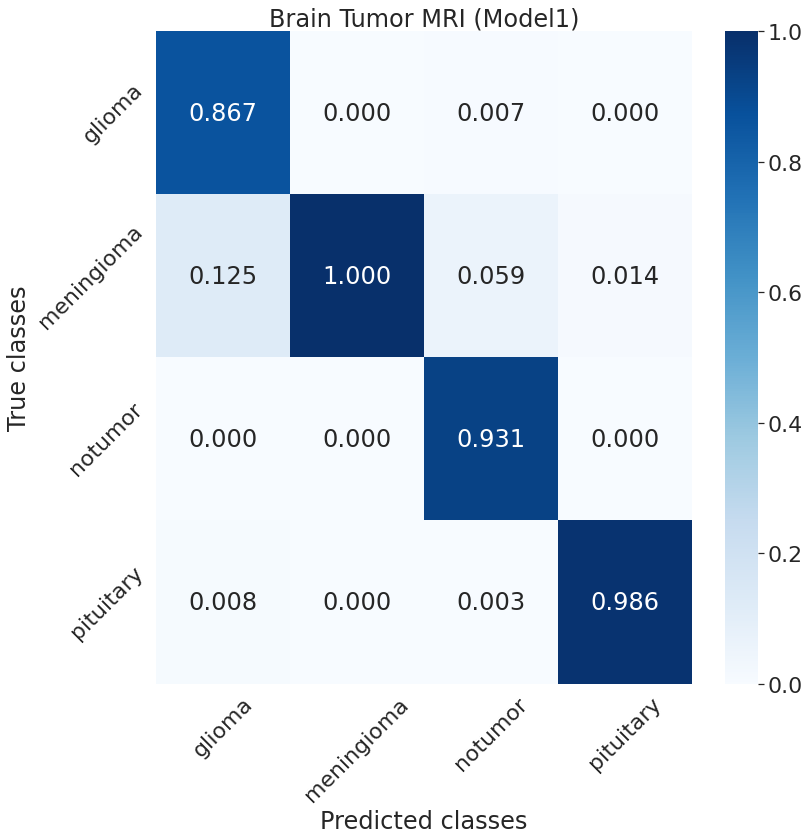

In [ ]:
#Confusion matrix of model1
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

plt.figure(figsize=(12,12))
sns.set(font_scale=2.0)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.3f')

plt.ylabel('True classes')
yticks, _ = plt.yticks()
plt.yticks(ticks=yticks, labels=labels, rotation=45)

plt.xlabel('Predicted classes')
xticks, _ = plt.xticks()
plt.xticks(ticks=xticks, labels=labels, rotation=45)

plt.title('Brain Tumor MRI (Model1)')

plt.show()

In [ ]:
true_labels = []
predicted_labels = []

for x, y in test_ds:
    true_labels.append(y)
    predicted_labels.append(model2.predict(x))
    
true_labels = np.concatenate(true_labels, axis=0)
predicted_labels = np.concatenate(predicted_labels, axis=0)

true_labels_list = []
predicted_labels_list = [] 

for (tr_lbl, pr_lbl) in zip (true_labels, predicted_labels):
    true_labels_list.append(np.argmax(tr_lbl))
    predicted_labels_list.append(np.argmax(pr_lbl))
    
true_labels_list = np.array(true_labels_list)
predicted_labels_list = np.array(predicted_labels_list)

print(true_labels_list)
print(predicted_labels_list)

cf_matrix = confusion_matrix(y_true=true_labels_list, y_pred=predicted_labels_list, normalize='pred')

1/1 [==============================] - 0s 128ms/step
[0 3 2 1 0 2 3 1 3 2 0 3 2 1 0 2 2 2 2 0 3 2 1 1 3 3 1 0 0 3 0 1 0 0 2 0 1
 3 0 1 1 2 1 1 2 1 1 2 2 2 3 2 3 0 3 0 0 3 3 1 0 2 1 2 2 1 1 2 3 2 0 1 2 0
 2 0 3 2 0 2 3 3 3 2 2 1 0 0 0 0 1 2 0 0 0 0 1 3 2 3 1 1 2 2 2 0 3 2 3 2 3
 2 1 2 2 0 0 0 3 1 2 2 3 1 3 1 0 2 1 1 2 2 3 1 0 1 2 0 1 0 3 0 1 3 2 2 1 0
 3 0 2 0 2 1 2 2 1 2 2 2 2 1 2 1 3 3 3 2 3 2 1 2 2 0 1 0 0 2 3 3 2 3 0 1 2
 3 1 0 1 1 0 3 3 3 1 1 2 1 0 0 3 1 2 3 0 0 1 3 0 0 0 2 0 3 1 2 0 2 1 3 0 3
 3 0 3 2 0 3 1 3 3 1 1 2 1 1 0 1 0 2 2 2 3 0 2 0 0 2 2 2 2 0 3 3 0 1 3 0 3
 0 2 2 3 0 3 0 3 0 1 0 1 0 1 2 1 3 2 2 0 0 1 1 2 2 0 3 1 1 2 0 0 3 3 3 2 1
 2 1 0 1 3 3 2 0 1 1 0 0 2 3 0 0 2 1 0 2 3 1 0 3 3 1 1 1 2 3 3 0 1 2 2 0 2
 2 0 0 1 2 3 1 0 2 2 0 1 3 2 3 2 1 2 2 0 0 0 3 3 0 2 2 2 0 3 0 3 3 0 3 1 3
 3 0 1 3 3 2 2 3 0 3 2 3 3 0 2 0 2 2 3 3 0 1 3 3 3 3 3 0 3 1 0 0 2 1 2 3 3
 2 0 2 1 0 3 2 0 2 2 0 2 3 1 1 1 3 3 0 2 0 2 2 1 0 2 3 1 2 2 2 0 3 3 2 2 1
 2 3 2 2 1 1 1 2 2 1 1 0 2 1 3 1 1 3 1 1 1 3 2 

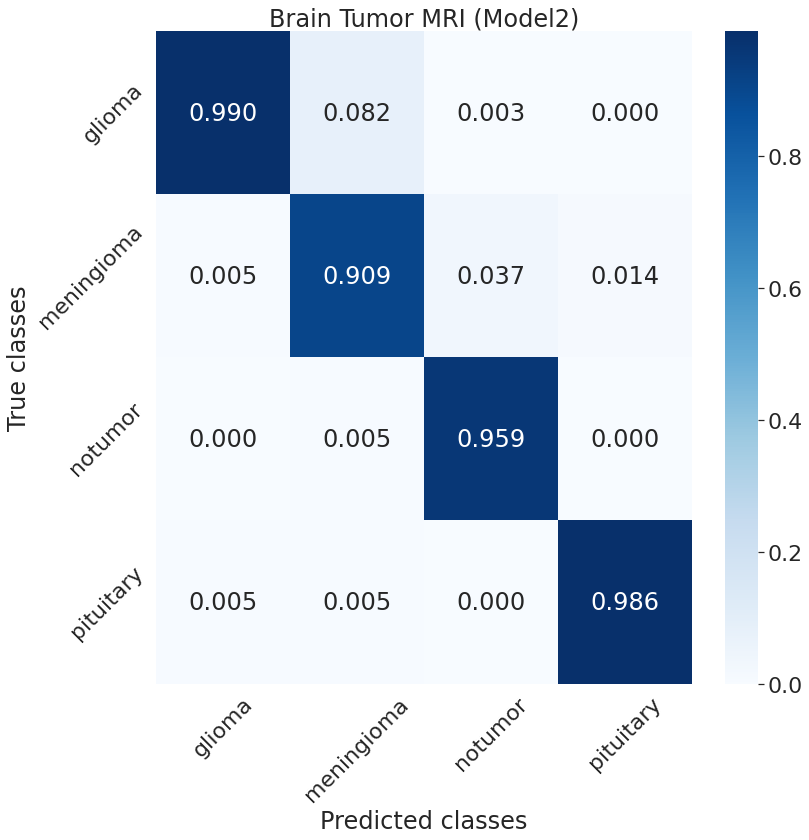

In [ ]:
#Confusion matrix of model2
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

plt.figure(figsize=(12,12))
sns.set(font_scale=2.0)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.3f')

plt.ylabel('True classes')
yticks, _ = plt.yticks()
plt.yticks(ticks=yticks, labels=labels, rotation=45)

plt.xlabel('Predicted classes')
xticks, _ = plt.xticks()
plt.xticks(ticks=xticks, labels=labels, rotation=45)

plt.title('Brain Tumor MRI (Model2)')

plt.show()

In [ ]:
true_labels = []
predicted_labels = []

for x, y in test_ds:
    true_labels.append(y)
    predicted_labels.append(model.predict(x))
    
true_labels = np.concatenate(true_labels, axis=0)
predicted_labels = np.concatenate(predicted_labels, axis=0)

true_labels_list = []
predicted_labels_list = [] 

for (tr_lbl, pr_lbl) in zip (true_labels, predicted_labels):
    true_labels_list.append(np.argmax(tr_lbl))
    predicted_labels_list.append(np.argmax(pr_lbl))
    
true_labels_list = np.array(true_labels_list)
predicted_labels_list = np.array(predicted_labels_list)

print(true_labels_list)
print(predicted_labels_list)

cf_matrix = confusion_matrix(y_true=true_labels_list, y_pred=predicted_labels_list, normalize='pred')

1/1 [==============================] - 0s 199ms/step
[3 0 3 1 1 3 3 0 3 0 1 0 0 2 3 3 0 3 1 2 2 0 1 2 1 2 3 3 2 0 0 3 3 2 2 3 1
 2 3 2 2 1 2 2 1 0 0 2 2 0 1 2 1 1 2 2 2 0 2 0 0 3 3 3 1 3 2 3 2 2 2 1 0 3
 3 2 2 3 3 1 2 2 1 0 3 2 0 0 3 0 1 1 1 1 0 2 3 2 2 2 3 3 1 2 3 0 2 1 3 2 1
 2 2 1 2 3 0 2 1 3 0 1 2 0 2 3 0 0 0 1 2 1 1 3 1 2 2 0 1 0 3 1 2 2 3 2 1 3
 2 1 2 2 2 1 2 0 0 2 2 3 3 2 3 2 0 2 0 3 1 1 3 2 2 1 2 0 2 2 0 2 3 3 2 2 3
 2 3 1 2 0 1 1 2 2 1 0 0 0 2 3 0 0 2 1 3 0 3 1 2 1 1 0 2 3 1 1 3 1 2 1 3 2
 1 2 0 0 2 1 3 2 0 1 1 3 2 0 1 1 3 1 2 2 0 1 1 1 0 2 1 2 2 3 2 3 2 2 1 2 1
 2 1 2 1 0 2 0 3 1 0 3 3 0 3 2 0 1 1 1 1 3 2 0 3 2 3 2 0 0 0 0 3 3 3 1 3 2
 0 0 0 2 2 2 2 2 3 3 1 0 0 0 3 1 3 2 2 1 2 1 1 1 2 1 1 2 3 2 1 3 1 3 1 1 1
 1 0 0 3 2 1 2 2 2 3 2 3 2 3 0 3 1 3 3 3 0 1 2 1 3 0 2 2 0 2 2 1 2 1 2 3 0
 1 0 3 2 1 1 0 2 3 1 0 0 2 2 0 3 1 2 2 0 1 2 0 1 2 0 1 3 3 2 3 2 0 2 2 0 0
 1 0 3 1 2 0 0 1 2 1 2 0 0 2 3 0 0 3 0 2 2 2 2 0 2 2 0 2 2 2 0 1 3 1 3 2 1
 1 0 0 0 1 1 0 1 1 1 2 1 2 2 1 0 1 0 3 2 2 2 2 

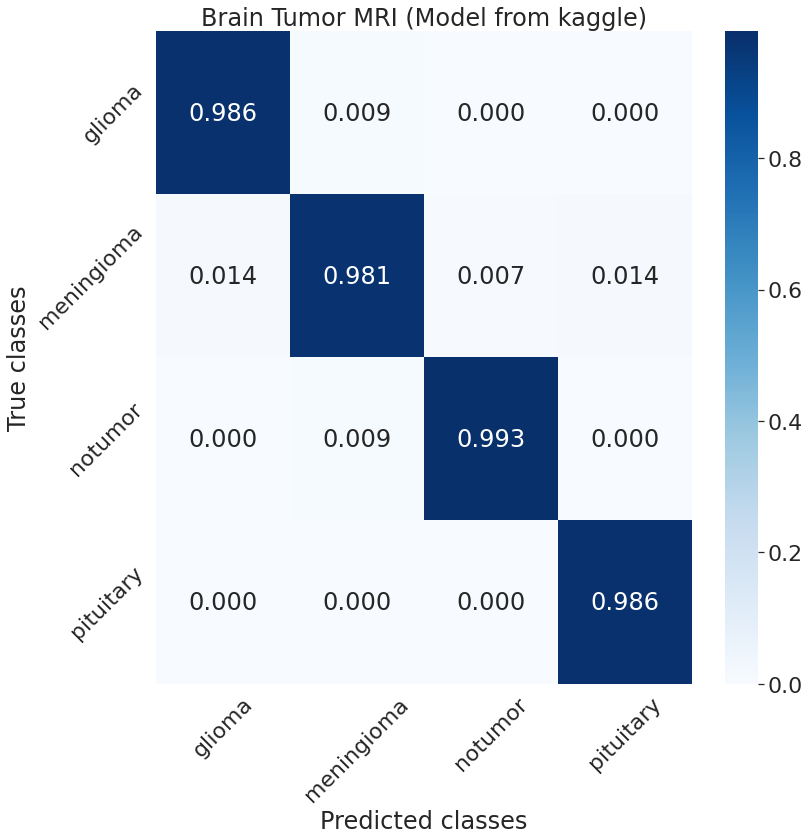

In [ ]:
#Confusion matrix of model from kaggle
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

plt.figure(figsize=(12,12))
sns.set(font_scale=2.0)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.3f')

plt.ylabel('True classes')
yticks, _ = plt.yticks()
plt.yticks(ticks=yticks, labels=labels, rotation=45)

plt.xlabel('Predicted classes')
xticks, _ = plt.xticks()
plt.xticks(ticks=xticks, labels=labels, rotation=45)

plt.title('Brain Tumor MRI (Model from kaggle)')

plt.show()